<a href="https://colab.research.google.com/github/camiPadilla/SIS420CP/blob/main/OneVsAll_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

#Usamos la libreria de pandas
import pandas as pd
# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy optimiza la funcion de costo
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

#Codificamos etiquetas de clase en valor numericos
from sklearn.preprocessing import LabelEncoder

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [3]:
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784 #transformamos la imagen en un vector, so la imagen de 28 x 28 se convierte en un vector de 784 unidades

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10 #trabajamos 10 numeros so son 10 valores

# cargamos data y almacenamos este en data
data = pd.read_csv('/content/drive/MyDrive/dataset/Tifinagh-version.csv')

print(data)

        0  1  0.1  0.2  2  0.3  3  0.4  1.1  1.2  ...  0.361  0.362  4.9  \
0       0  3    0    1  2    0  0    0    1    0  ...      0      1    4   
1       0  1    0    0  0    2  0    0    1    0  ...      0      0    3   
2       0  0    0    0  0    3  0    0    0    0  ...      3      0    0   
3       0  0    2    0  0    1  0    0    1    0  ...      0      1    0   
4       0  0    1    1  0    2  0    0    1    0  ...      0      0    0   
...    .. ..  ...  ... ..  ... ..  ...  ...  ...  ...    ...    ...  ...   
25734  32  1    1    0  0    0  0    2    0    1  ...      1      2    0   
25735  32  1    0    0  0    1  1    0    3    0  ...      0      3    0   
25736  32  2    0    0  0    3  0    2    0    0  ...      0      1    5   
25737  32  0    0    0  3    0  0    2    0    0  ...      0      0    3   
25738  32  0    3    0  0    2  0    0    0    0  ...      0      0    0   

       0.363  0.364  0.365  0.366  0.367  0.368  0.369  
0          1      0      0    

In [4]:
data

,0,1,0.1,0.2,2,0.3,3,0.4,1.1,1.2,...,0.361,0.362,4.9,0.363,0.364,0.365,0.366,0.367,0.368,0.369
0,0,3,0,1,2,0,0,0,1,0,...,0,1,4,1,0,0,0,0,0,0
1,0,1,0,0,0,2,0,0,1,0,...,0,0,3,1,0,0,0,0,0,0
2,0,0,0,0,0,3,0,0,0,0,...,3,0,0,2,0,0,0,0,0,0
3,0,0,2,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,1,1,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25734,32,1,1,0,0,0,0,2,0,1,...,1,2,0,1,0,0,0,0,0,0
25735,32,1,0,0,0,1,1,0,3,0,...,0,3,0,0,1,2,0,0,0,0
25736,32,2,0,0,0,3,0,2,0,0,...,0,1,5,0,0,0,0,0,0,0
25737,32,0,0,0,3,0,0,2,0,0,...,0,0,3,2,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25739 entries, 0 to 25738
Columns: 785 entries, 0 to 0.369
dtypes: int64(785)
memory usage: 154.2 MB


In [6]:
# Convertimos las columnas categoricas en columnas numericas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [8]:
#Lectura de datos
X, y = data.iloc[:, :-1].values ,data['0'].values.ravel() # Todas las filas, todas las columnas excepto la última
 # Los valores de la columna 'y' como arreglo unidimensional
y[y == 10] = 0 #valores de y que son 10,los vuelva 0

m = y.size

In [9]:
# Imprimimos los valores de X y y
print(X)
print('-'*15)
print(y)

[[ 0  3  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [32  2  0 ...  0  0  0]
 [32  0  0 ...  0  0  0]
 [32  0  3 ...  0  0  0]]
---------------
[ 0  0  0 ... 32 32 32]


In [10]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    X = np.array(X)  # Convertir a arreglo de numpy

    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensional.')

    example_width = example_width or int(np.sqrt(n))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.sqrt(m))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='C'), cmap='Greys', extent=[0, 1, 0, 1], aspect='equal', origin='upper')
        ax.axis('off')

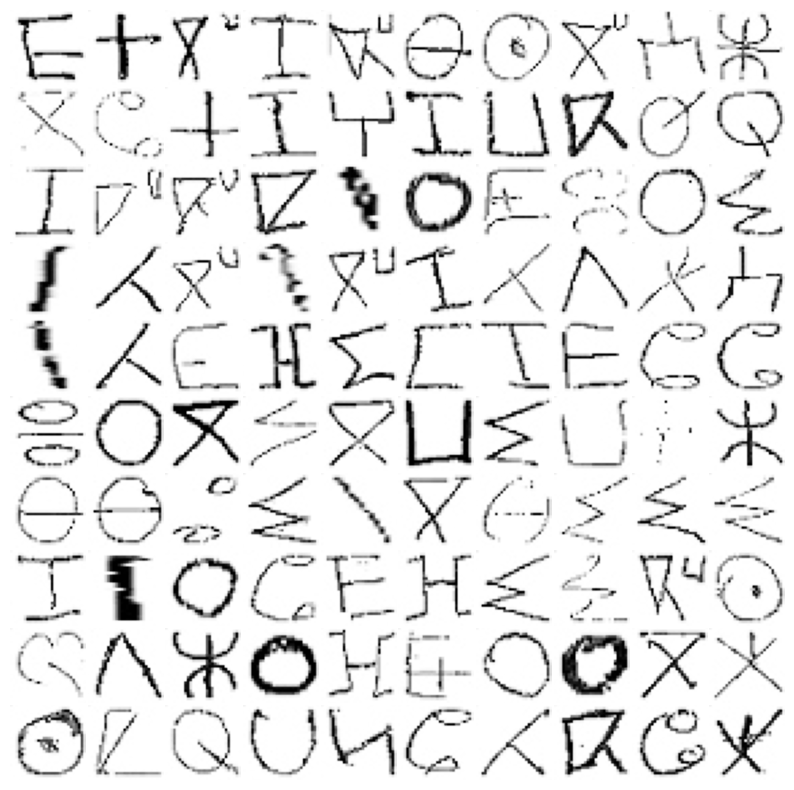

In [11]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [12]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

In [13]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [14]:
def lrCostFunction(theta, X, y, lambda_):

    # Inicializa algunos valores utiles
    m = y.size #numero de ejemplos del tamaño de y

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    #h supuesto valor de y

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

In [15]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.534819
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [16]:
def oneVsAll(X, y, num_labels, lambda_):

    # algunas variables utiles
    m, n = X.shape #m numero de jemplos y n numero de x

    # print(m, n)
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50} # le decimos cuantas intercciones haremos  1:13 audio
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        # print(res)
        all_theta[c] = res.x

    return all_theta

In [17]:
lambda_ = 0.0001
all_theta = oneVsAll(X, y, num_labels, lambda_)

<ipython-input-13-575a438e2fc3>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-14-610ae289c188>:19: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-14-610ae289c188>:19: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-13-575a438e2fc3>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-14-610ae289c188>:19: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-14-610ae289c188>:19: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + 

In [18]:
print(all_theta.shape)
print(all_theta[0])

(10, 785)
[-4.67009445e-04 -3.32875606e-02 -3.96049759e-05 -1.13722246e-04
 -9.13495932e-05  1.12849383e-06 -1.60455963e-04 -5.48986629e-05
 -6.83020267e-06 -1.67599496e-04 -2.52787133e-04 -3.69392285e-04
 -1.86728085e-04 -2.22624593e-04 -5.24896673e-04 -1.72178763e-04
 -3.77956756e-04 -4.08568493e-04 -2.57570768e-04 -4.13139019e-04
 -2.07058217e-04 -3.07068909e-04 -2.02104916e-04 -2.13416637e-04
 -2.18167399e-04 -2.34264405e-04 -9.70410129e-05 -1.16292109e-04
 -1.10297258e-05 -1.42603575e-05 -1.55350233e-04 -7.70997425e-04
 -2.38828711e-03 -1.04302974e-03 -7.06488911e-04 -6.81410790e-04
 -9.27463764e-04 -1.07276269e-03 -2.60709538e-04 -1.84066383e-03
 -2.84962149e-03 -2.43255417e-03 -1.39026287e-03 -9.16309187e-04
 -2.43389816e-03 -2.20949160e-03 -2.04395835e-03 -1.41328795e-03
 -2.07135269e-03 -1.77888516e-03 -1.01138108e-03 -7.52104216e-04
 -2.15449266e-03 -1.87728402e-03 -2.64812353e-03 -5.41920850e-03
 -1.01234015e-03 -5.57395875e-06 -2.15550869e-04 -1.92072068e-03
 -7.45291068e-0

In [19]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

    return p

(25739, 784)
Precision del conjuto de entrenamiento: 33.27%
(100, 784)
(100, 785)
[4 0 7 0 5 7 0 0 0 0 0 7 0 2 0 3 0 4 0 9 7 1 0 0 0 0 0 7 0 0 2 2 0 2 0 4 7
 0 0 1 0 3 0 5 2 7 6 4 0 7 0 4 1 0 4 3 0 5 7 4 3 5 4 2 0 0 8 4 0 4 7 4 0 0
 0 0 7 3 5 0 4 0 0 4 0 4 0 0 7 0 9 9 4 2 4 3 6 1 7 0] [18  0 26  0  5 13  0 30  0 17  0 28  0 30 15 15 23 16 14  9  7 19 20 19
 20 22 27 32 27 21  2 32 17  2 14 16 26 22 21  1 32  3 12  5  2 26  6  4
 15 20 15 32 19 19 15  3  0  5  7  4 27  5 29  2 19 26  8 30 21 24 26 18
 20 12 28  0 28  3  5 30 18  0 29 24 15 24 14  0 26 21  9 30 18  2 16  3
 11  1 27 21]


'\n0 T-shirt/top\n1 Trouser\n2 Pullover\n3 Dress\n4 Coat\n5 Sandal\n6 Shirt\n7 Sneaker\n8 Bag\n9 Ankle boot\n'

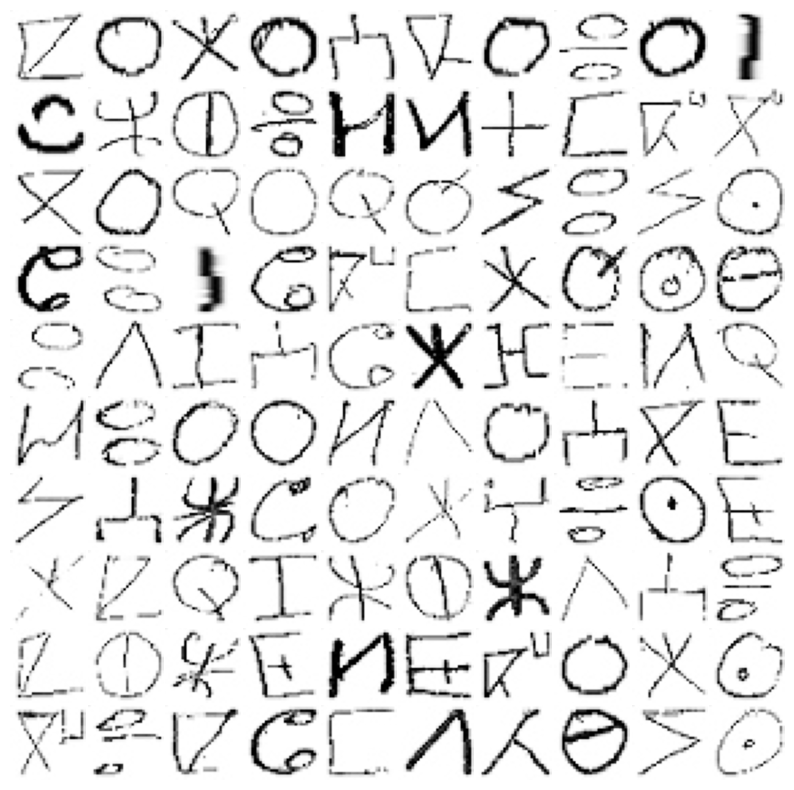

In [20]:
print(X.shape)
pred = predictOneVsAll(all_theta, X) # x son todas la imagenes
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
# XPrueba = X[4490:4590, :].copy()

# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
XPrueba = X[rand_indices, :]
XPruebaV = XPrueba.copy()


print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((100, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p, y[rand_indices])

displayData(XPruebaV)
